In [6]:
import numpy as np 
import pandas as pd
import os
import cv2
import os
import re
import torch
import torchvision
from torchvision import transforms 
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SequentialSampler
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm
import dill as pickle

In [7]:
model = torch.load('./outputs/wind_turbine_detector_fold_0.model')

In [ ]:
model.eval()

In [14]:
filehandler = open('./outputs/test_data_loader.pickle', 'rb') 
test_data_loader = pickle.load(filehandler)

In [23]:
def print_model_output(images, outputs, idx, detection_threshold):
        """
        Display the model's detection output for a specific image.

        Parameters:
        - outputs (list): List of dictionaries containing model outputs for each image.
        - idx (int): Index of the image for which to display the detection results.
        - detection_threshold (float): Confidence threshold for filtering out low-confidence detections.

        Returns:
        None

        This function takes the model outputs, extracts bounding boxes and scores, filters
        detections based on the provided confidence threshold, and visualizes the results on
        the input image. The image with bounding boxes and corresponding confidence scores is
        displayed using matplotlib.

        Note:
        - The function assumes that the model output contains an 'image' key, which represents
          the input image, and a 'model_output' key, which contains 'boxes' and 'scores' for
          object detection results.

        Example:
        ```python
        # Assuming 'outputs' is a list of model outputs
        print_model_output(outputs, 0, 0.5)
        ```
        """
        sample = images[idx].permute(1,2,0).cpu().numpy()
        boxes = outputs[idx]['boxes'].data.cpu().numpy()
        scores = outputs[idx]['scores'].data.cpu().numpy()
        boxes = boxes[scores >= detection_threshold].astype(np.int32)
        fig, ax = plt.subplots(1, 1, figsize=(16, 8))
        for idx, box in enumerate(boxes):
            sample = cv2.rectangle(sample.copy(),
                          (box[0], box[1]),
                          (box[2], box[3]),
                          (220, 0, 0), 2)
            sample = cv2.putText(sample, str(scores[idx]), (box[0], box[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (220, 0, 0), 2)

        ax.set_axis_off()
        ax.imshow(sample)

In [24]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [25]:
for images_batch, targets, image_ids in tqdm(test_data_loader):
    images = list(image.to(device) for image in images_batch)
    outputs = model(images)
    break

  0%|          | 0/7 [00:00<?, ?it/s]

[11/14/23 15:52:08] WARNING  Clipping input data to the valid range for imshow with RGB data ([0..1]   ]8;id=199125;file:///home/persepolis/prj/fp/un-wind/un-wind/lib/python3.9/site-packages/matplotlib/image.py\image.py]8;;\:]8;id=286320;file:///home/persepolis/prj/fp/un-wind/un-wind/lib/python3.9/site-packages/matplotlib/image.py#701\701]8;;\
                             for floats or [0..255] for integers).                                                 

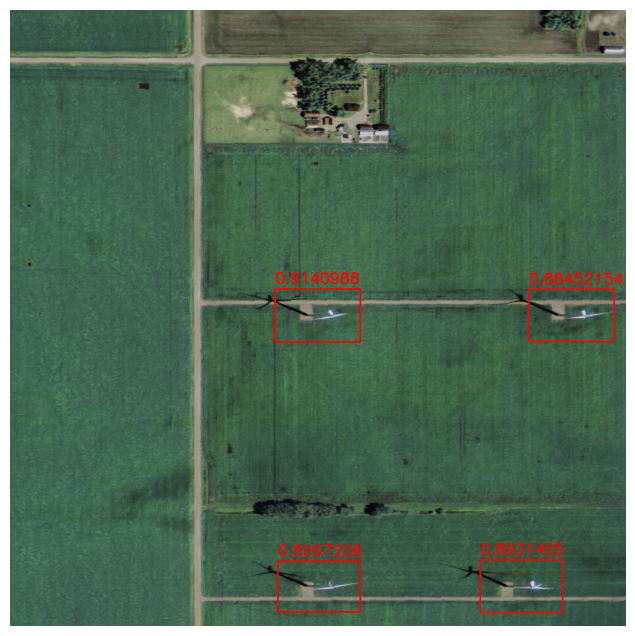

In [32]:
print_model_output(images_batch, outputs, 6, 0.8)

[11/14/23 15:52:23] WARNING  Clipping input data to the valid range for imshow with RGB data ([0..1]   ]8;id=289234;file:///home/persepolis/prj/fp/un-wind/un-wind/lib/python3.9/site-packages/matplotlib/image.py\image.py]8;;\:]8;id=719593;file:///home/persepolis/prj/fp/un-wind/un-wind/lib/python3.9/site-packages/matplotlib/image.py#701\701]8;;\
                             for floats or [0..255] for integers).                                                 

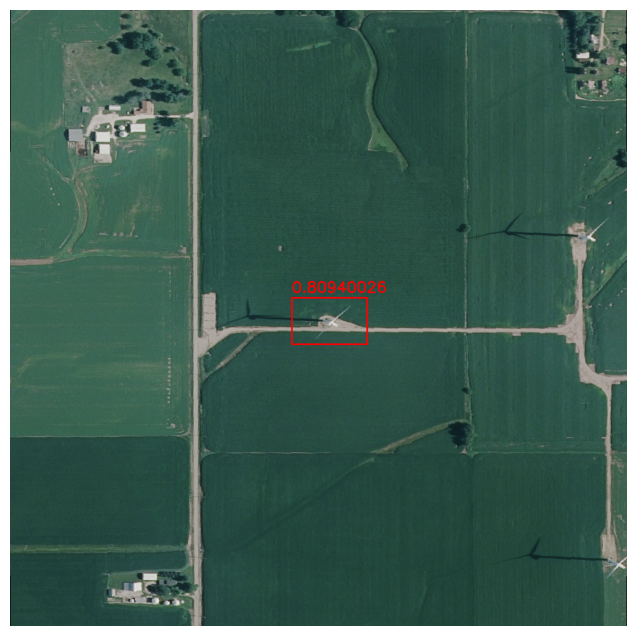

In [33]:
print_model_output(images_batch, outputs, 7, 0.8)

[11/14/23 15:52:31] WARNING  Clipping input data to the valid range for imshow with RGB data ([0..1]   ]8;id=382855;file:///home/persepolis/prj/fp/un-wind/un-wind/lib/python3.9/site-packages/matplotlib/image.py\image.py]8;;\:]8;id=399976;file:///home/persepolis/prj/fp/un-wind/un-wind/lib/python3.9/site-packages/matplotlib/image.py#701\701]8;;\
                             for floats or [0..255] for integers).                                                 

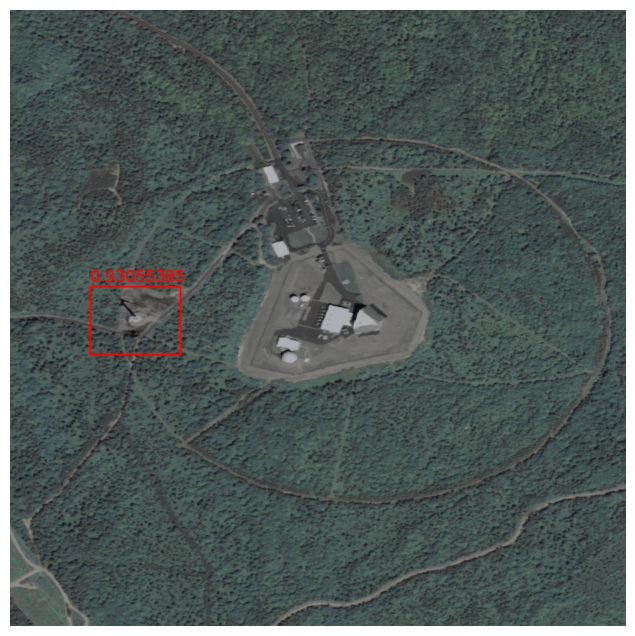

In [34]:
print_model_output(images_batch, outputs, 5, 0.8)

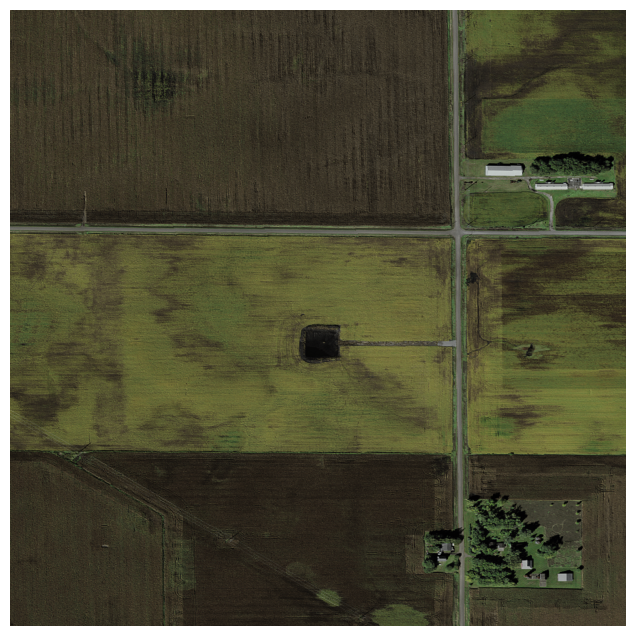

In [35]:
print_model_output(images_batch, outputs, 4, 0.8)

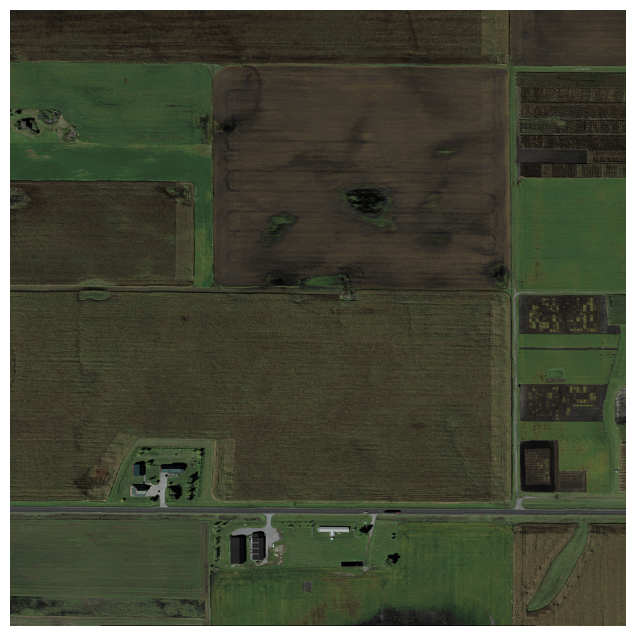

In [36]:
print_model_output(images_batch, outputs,3, 0.8)